# Auditory Sound Processing - Part I: Basics

## Reading in Sound: WAV-files

In IPYNB-files I am using "pylab inline", to make the content easier to read. This loads many *numpy* and *matplotlib.pyplot* functions into the current workspace, and activates interactive graphics.

In [1]:
%pylab inline
import os
from scipy.io.wavfile import read

Populating the interactive namespace from numpy and matplotlib


In many programming languages there are tools to read in WAV-files ("Waveform Audio File Format").

WAV files have a strictly defined format:
<img src="data/images/WAV-chunks.png">

An easy way to access most other sound-types is use the open source program [FFMPEG](http://ffmpeg.org) to convert other sound types to WAV.
<img src="data/images/SoundFiles.png" width=500>

<img src="data/images/piano.jpg" width=200>

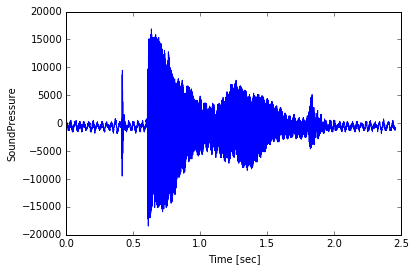

In [2]:
# Go to the location of the script. Note: this depends on your system!!
curDir = r'D:\Users\thomas\Office\python\CSS\ipynb'
os.chdir(curDir)

# "Audio" (see below, in the section "Play Sound") seems to be executed from the root-dir of the ipynb program
audioDir = r'data\sounds'

# Here we only work with WAV-files
soundFile = os.path.join(audioDir, 'a1.wav')

# You always have to read in the sample rate AND the data!
rate, data = read(soundFile)
t = arange(len(data))/rate

# Plot the data, and label the axes
plot(t, data)
xlabel('Time [sec]')
ylabel('SoundPressure')

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    [data, rate] = audioread(inFile);



## Information about the sound

In [3]:
if len(data.shape)==1:
    print('Mono sound')
else:
    print('Stereo sound')

Mono sound


In [4]:
data.dtype

dtype('int16')

In [5]:
nData = len(data)
duration = nData/rate
print('Duration of recording: {0:4.2f} sec'.format(duration))

Duration of recording: 2.46 sec


<font color='red'>
*Matlab Equivalent Commands*:
</font>

    info = audioinfo(inFile);

#### Example of stereo sound
Be careful: if you read in stereo-sound, you obtain a matrix, not a vector!

In [6]:
soundFile = os.path.join(audioDir, 'tiger.wav')
rate, data = read(soundFile)
data.shape

(230400, 2)

## Play Sound

In [7]:
from IPython.display import Audio, display

def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [8]:
# back to a plain tone:
soundFile = os.path.join(audioDir, 'a1.wav')
rate, data = read(soundFile)
play(data, rate)

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    player = audioplayer(data, rate);
    play(player);

## Fourier Transform & Power spectrum

To see the frequency content of this sound, we can transfer the signal from the time into the frequency domain

<img src='https://upload.wikimedia.org/wikipedia/commons/6/66/Idea_FourierTransform.png', width=300>

For *n* discrete datapoints $f_n$, the Fourier Transformation is given by:

\begin{equation}
  {f_\tau } = \frac{1}{N}\sum\limits_{n = 0}^{N - 1} {{F_n}\,{e^{2\pi i\,\frac{n \cdot \tau }{N}}}} \hspace{5 mm} with \; \tau=1,...,N
\end{equation}

The coefficients $F_n$ can be obtained by the back-transformation:

\begin{equation}
  {F_n} = \sum\limits_{\tau  = 0}^{N - 1} {{f_\tau }\,{e^{ - 2\pi i\,\frac{{n \cdot \tau }}{N}}}}  \hspace{5 mm} with \enspace n=1,...,N
\end{equation}

(0, 5512.296368807949)

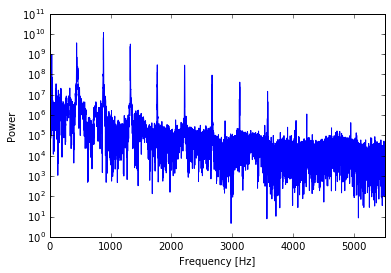

In [16]:
# Fourier Transformation of the data
# Here we use the function "fft" from the package "np.fft"
fftData = fft.fft(data)

# The Powerspectrum only contains the magnitude of the Fourier components
# Note: The conversion to real is only to eliminate an annoying Warning message
Pxx = real(fftData*fftData.conj()) / nData
freq = arange(nData)/duration

# Plot the data
semilogy(freq,Pxx)

# Format the plot
xlabel('Frequency [Hz]')
ylabel('Power')
Nyquist = max(freq)/2
xlim(0, Nyquist)

In [13]:
type(Pxx[0])

numpy.complex128

### Interpretation of the Fourier Coefficients

Each Fourier coefficient is a complex number, with a magnitude and a phase.

<img src="data/images/ComplexNumber.jpg", width=300>

The magnitude gives the amplidue of the corresponding Fourier component; and the phase the phase shift, compared to a pure cosine wave.

### Symmetry of Powerspectrum
For real inputs f(t) we have the following relation:

$F(ω)=F(−ω)^∗$

As a consequence, the powerspectrum is symmetrical!

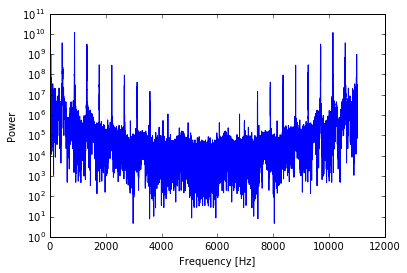

In [10]:
semilogy(freq, Pxx)
xlabel('Frequency [Hz]')
ylabel('Power')

In [11]:
%precision 2
print(fftData[1:3])  # second and third Fourier coefficients
print(fftData[:-3:-1]) # last two Fourier coefficients, with sequence reversed!

[-167240.92-894878.j   -837190.94+290807.52j]
[-167240.92+894878.j   -837190.94-290807.52j]


### Frequency of the Fourier Coefficients
* The power in the *zero frequency* is proportional to the offset of the signal.
* The lowest frequency is determined by the length of the recorded signal: $f_1 =\frac{1}{\Delta t * N} = \frac{1}{Duration}$.
* The highest frequency is determined by the sample rate: $f_N = \frac{1}{\Delta t} = rate$.

### Spectral density for practical applications: Welch-periodogram

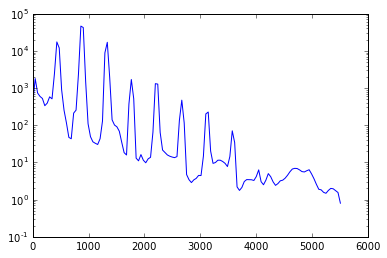

In [12]:
from scipy.signal import welch
f, Pxx = welch(data, rate)
semilogy(f, Pxx)

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    [Pxx, f] = periodogram(data,[],[], rate);

## Further links to sound processing

* [FFMPEG](http://www.ffmpeg.org/) A complete, cross-platform solution to record, convert and stream audio and video. 
* [thLib.sounds](http://work.thaslwanter.at/thLib/html/sounds.html) My own implementation of reading/writing/playing sounds. Uses FFMPEG.
* [Pydub](http://pydub.com/) Lets you manipulate audio with a simple and easy high level interface. Requires FFMPEG.

<img src="data/images/Forward.png", align='left'> [Soundproc_2_TimeDependence](Soundproc_2_TimeDependence.ipynb)

    Author: Thomas Haslwanter
    Date: March 06, 2016
    Ver: 2.0

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.